In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ompy as om

(<matplotlib.collections.QuadMesh at 0x135467ee0>,
 <AxesSubplot: xlabel='$\\gamma$-ray energy $E_{\\gamma}$', ylabel='Excitation energy $E_{x}$'>,
 <Figure size 640x480 with 2 Axes>)

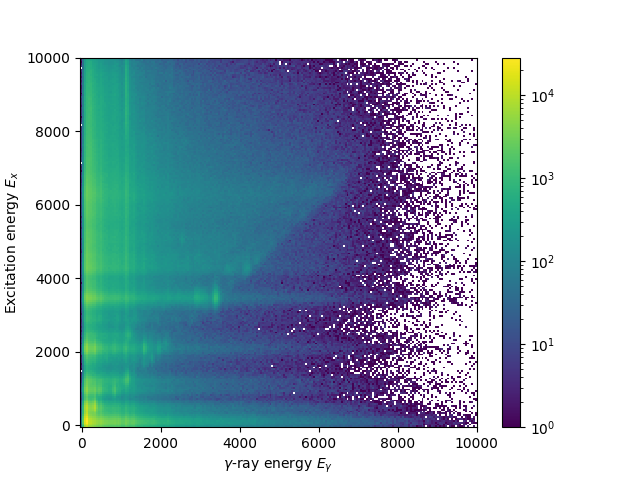

In [3]:
alfna = om.Matrix(path="alfna_all.mat")
E_rebinned = np.array([float(v) for v in np.arange(0, 10050, 50)])
alfna.rebin(axis='both', mids=E_rebinned)
alfna.plot()

2023-01-03 15:40:55,337 - ompy.response - INFO - Note: Spectra outside of 50 and 20000 are extrapolation only.


  0%|          | 0/201 [00:00<?, ?it/s]

2023-01-03 15:40:59,195 - ompy.response - INFO - Note: Spectra outside of 50 and 20000 are extrapolation only.


  0%|          | 0/201 [00:00<?, ?it/s]

(<matplotlib.collections.QuadMesh at 0x137ea86d0>,
 <AxesSubplot: xlabel='$\\gamma$-ray energy $E_{\\gamma}$', ylabel='Excitation energy $E_{x}$'>,
 <Figure size 640x480 with 2 Axes>)

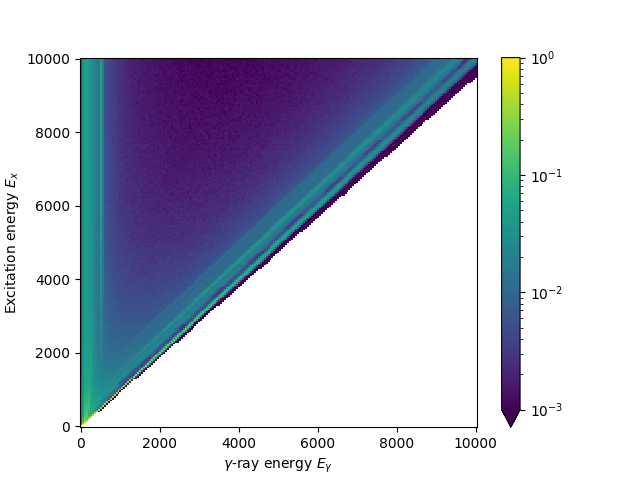

In [29]:
fwhm_abs = 3.0*1332./100.
logger = om.introspection.get_logger('response', 'INFO')

#response = om.Response("labr_miniball2016.zip")
response = om.Response("Arkiv.zip")
R_ompy_view, R_tab_view = response.interpolate(Eout=E_rebinned, fwhm_abs=fwhm_abs, return_table=True)
R_ompy_unf, R_tab_unf = response.interpolate(Eout=E_rebinned, fwhm_abs=fwhm_abs/10., return_table=True)
R_ompy_view.plot(scale='log', vmin=1e-3)

(<matplotlib.collections.QuadMesh at 0x13aaa4550>,
 <AxesSubplot: title={'center': 'Unfolded'}, xlabel='$\\gamma$-ray energy $E_{\\gamma}$', ylabel='Excitation energy $E_{x}$'>,
 <Figure size 640x480 with 2 Axes>)

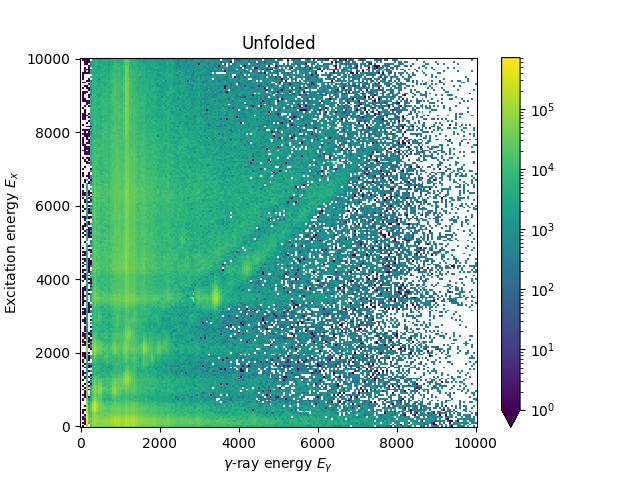

In [30]:
unfolder = om.Unfolder(response=R_ompy_unf)
unfolder.use_compton_subtraction = True # default
unfolder.response_tab = R_tab_unf

unfolder(alfna).plot(vmin=1)

In [28]:
df = pd.read_csv("ocl_response/resp_original.csv")
fwhm_rel = float(df[df.Eg == 1330].FWHM_rel_norm / 1330)
df.FWHM_rel_norm = df.FWHM_rel_norm/df.Eg
df.FWHM_rel_norm /= fwhm_rel
df.to_csv("ocl_response/resp.csv", index=False)